In [ ]:
#libraries needed to load images from a website and base64coding, install pyDes if necessary
#Code by: Oscar Camilo Pulido Peña
!pip install pyDes
import pyDes
import matplotlib.pyplot as plt
import cv2
import requests
import base64

  Created wheel for pyDes: filename=pyDes-2.0.1-py2.py3-none-any.whl size=9550 sha256=bb1268a7fa0c03ca08c130a2666f8c8bc0f1cbb375081c4a86ec72cae2f98fc9
  Stored in directory: /root/.cache/pip/wheels/8d/ff/d6/b38861c6a8fb5807fcd62e520d4d018caca96c8c3c645e47ec
Successfully built pyDes


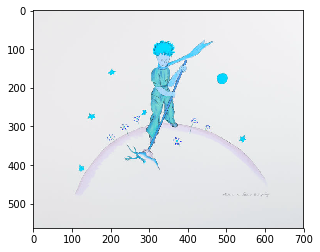

In [ ]:
#Step 1: charge image from website
#show cat before DES encrypt
#image is the byte representation of Petit Prince's image.

imageRoute = 'https://assets.catawiki.nl/assets/2017/6/27/9/c/6/9c6ff2a8-a530-4867-9dbe-e5e5271147c4.jpg'
imageBefore = requests.get(imageRoute).content
jpgBefore = open("catBefore.jpg","wb")
jpgBefore.write(imageBefore)
jpgBefore.close()
catImageBefore = cv2.imread("catBefore.jpg")
plt.imshow(catImageBefore)

In [ ]:
#Step2 cipher the image using pyDes
key = input ("Insert Key...")
data = pyDes.des(key, pyDes.CBC, "\0\0\0\0\0\0\0\0", pad=None, padmode=pyDes.PAD_PKCS5)
print("Byte representation of the image before DES cipher:")
print(imageBefore)
encrypted = data.encrypt(imageBefore)
print("Byte representation of the image after DES cipher:")
print(encrypted)

Insert Key...PETITPRI
Byte representation of the image before DES cipher:
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x023\x02\xbc\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x02\x06\x07\x08\xff\xc4\x00D\x10\x00\x02\x02\x02\x00\x04\x03\x05\x04\x07\x05\x07\x03\x05\x00\x00\x00\x01\x02\x03\x04\x11\x05\x12!1\x13AQ\x06"aq\x81\x142\x91\xa1#BR\x82\xb1\xc1\xd1\x153br\xf0\x07$C\x92\xa2\xc2\xe1S\xb2\xf1\x16%ET\x83\xff\xc4\x00\x1b\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x006\x11\x01\

In [ ]:
#Step 3 encoding in base64 encrypted byte representation of the image
encoded64 = base64.b64encode(encrypted)
print("Byte representation encoded in base64 of the image after DES cipher:")
print(encoded64)

Byte representation encoded in base64 of the image after DES cipher:
b'BgVaPpr8XuqhhEgwiyW2rAPjKH7jlqCxW31JkhlyohZM07Czhsj2i+aGIgy5LWqzxrdIrPNRlVnhMNpaOXjpsd2SBFC6LR8jWgrTwEd8WK/l4cJ1XKrN+wwOBcRBJrOKqj4A96LVKsMuwgKMUUAGlbq4uikTKqSTVX2nkEpH52/16VQMao2V8iUDuaqDnRUXClzv6QNhsl4ztbbfD8fXAtNZIbTKislMoWiJsfuBON7n6zB9s+kSWu4Z/+PYp5qU+Tnbt9PDDS8MyK02oVeYa9CPX3tWbkq3+pDNmG+E4ZGtx3an3LXEXxHgpiuDFb4VnlSKY/X8ic6iiqO16rKEd8u5eUWhRFf2X/EofLrDGfeTxxsE+Z4hk02qPUbPpLvVmDIeGlwKSS1GXnSByYp3OyvP4oSHaF7zIhK1+wa9Hv/C4KIjabKwBuj5Jpb0tqwG6ioymsxOxT5/7bXbDg42cE7nbihS3QiPMH2vfS91wZWeWz4Efo6suofqCpjxGSL3NMN7N2U06tbZ5SohDl+aUiQdztP+49lexRH9oO5s4nvV/kkJ0mXdRFkZqk8raqtHrl7VRmNNXPMFc4fUdMh/+XsbszwyqHUlFNaSXxft9fdVCyYhdlH7WGMj3NOdU/r7sjd7XBjTNgfngQNqPHkPxrkPpVCogBJGWjIkEU1HAOFPIyHzPZSawZZvP2LGwI7oPjIn2aUuCeFM05rUsIARiXbpUpOlawEJMytFY6E+INnPuR/1PkQybDIU1bg5q4ZmDh1GBYg6P10WtuItjeWvkxHyH5AAhFUef/hvF5tcaX2pC7vMK85yBynCklKyZ1KHYrC509whg7B4HSBf9KieAA84/Tug/glSNxRDcJKd9m7a/1Drv+IpVh3MM2ZFJLJQEKDtrJaUNDYjRmeXpJFPBg8wXFnOOcehs

In [ ]:
#Step4 decode from base 64 and decypher using pyDes
decoded64 = base64.b64decode(encoded64)
print("Byte representation of the image after DES cipher (after decoded in base64):")
print(decoded64)
decrypted = data.decrypt(decoded64)
print("Byte representation of the image after DES decipher (after decoded in base64):")
print(decrypted)

Byte representation of the image after DES cipher (after decoded in base64):
b'\x06\x05Z>\x9a\xfc^\xea\xa1\x84H0\x8b%\xb6\xac\x03\xe3(~\xe3\x96\xa0\xb1[}I\x92\x19r\xa2\x16L\xd3\xb0\xb3\x86\xc8\xf6\x8b\xe6\x86"\x0c\xb9-j\xb3\xc6\xb7H\xac\xf3Q\x95Y\xe10\xdaZ9x\xe9\xb1\xdd\x92\x04P\xba-\x1f#Z\n\xd3\xc0G|X\xaf\xe5\xe1\xc2u\\\xaa\xcd\xfb\x0c\x0e\x05\xc4A&\xb3\x8a\xaa>\x00\xf7\xa2\xd5*\xc3.\xc2\x02\x8cQ@\x06\x95\xba\xb8\xba)\x13*\xa4\x93U}\xa7\x90JG\xe7o\xf5\xe9T\x0cj\x8d\x95\xf2%\x03\xb9\xaa\x83\x9d\x15\x17\n\\\xef\xe9\x03a\xb2^3\xb5\xb6\xdf\x0f\xc7\xd7\x02\xd3Y!\xb4\xca\x8a\xc9L\xa1h\x89\xb1\xfb\x818\xde\xe7\xeb0}\xb3\xe9\x12Z\xee\x19\xff\xe3\xd8\xa7\x9a\x94\xf99\xdb\xb7\xd3\xc3\r/\x0c\xc8\xad6\xa1W\x98k\xd0\x8f_{VnJ\xb7\xfa\x90\xcd\x98o\x84\xe1\x91\xad\xc7v\xa7\xdc\xb5\xc4_\x11\xe0\xa6+\x83\x15\xbe\x15\x9eT\x8ac\xf5\xfc\x89\xce\xa2\x8a\xa3\xb5\xea\xb2\x84w\xcb\xb9yE\xa1DW\xf6_\xf1(|\xba\xc3\x19\xf7\x93\xc7\x1b\x04\xf9\x9e!\x93M\xaa=F\xcf\xa4\xbb\xd5\x982\x1e\x1a\\\nI-F^t\x81\xc9\x8aw;+\xc

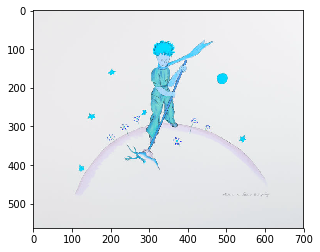

In [ ]:
#Step 5 Generate original image and show it
jpgAfter = open("catAfter.jpg","wb")
jpgAfter.write(decrypted) 
jpgAfter.close()
catImageAfter = cv2.imread("catAfter.jpg")
plt.imshow(catImageAfter)